# Chapter 26: The definition of quality

For additional context see chapter 26 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [3]:
# Import libraries
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## Fig 26.1: The traditional view of quality

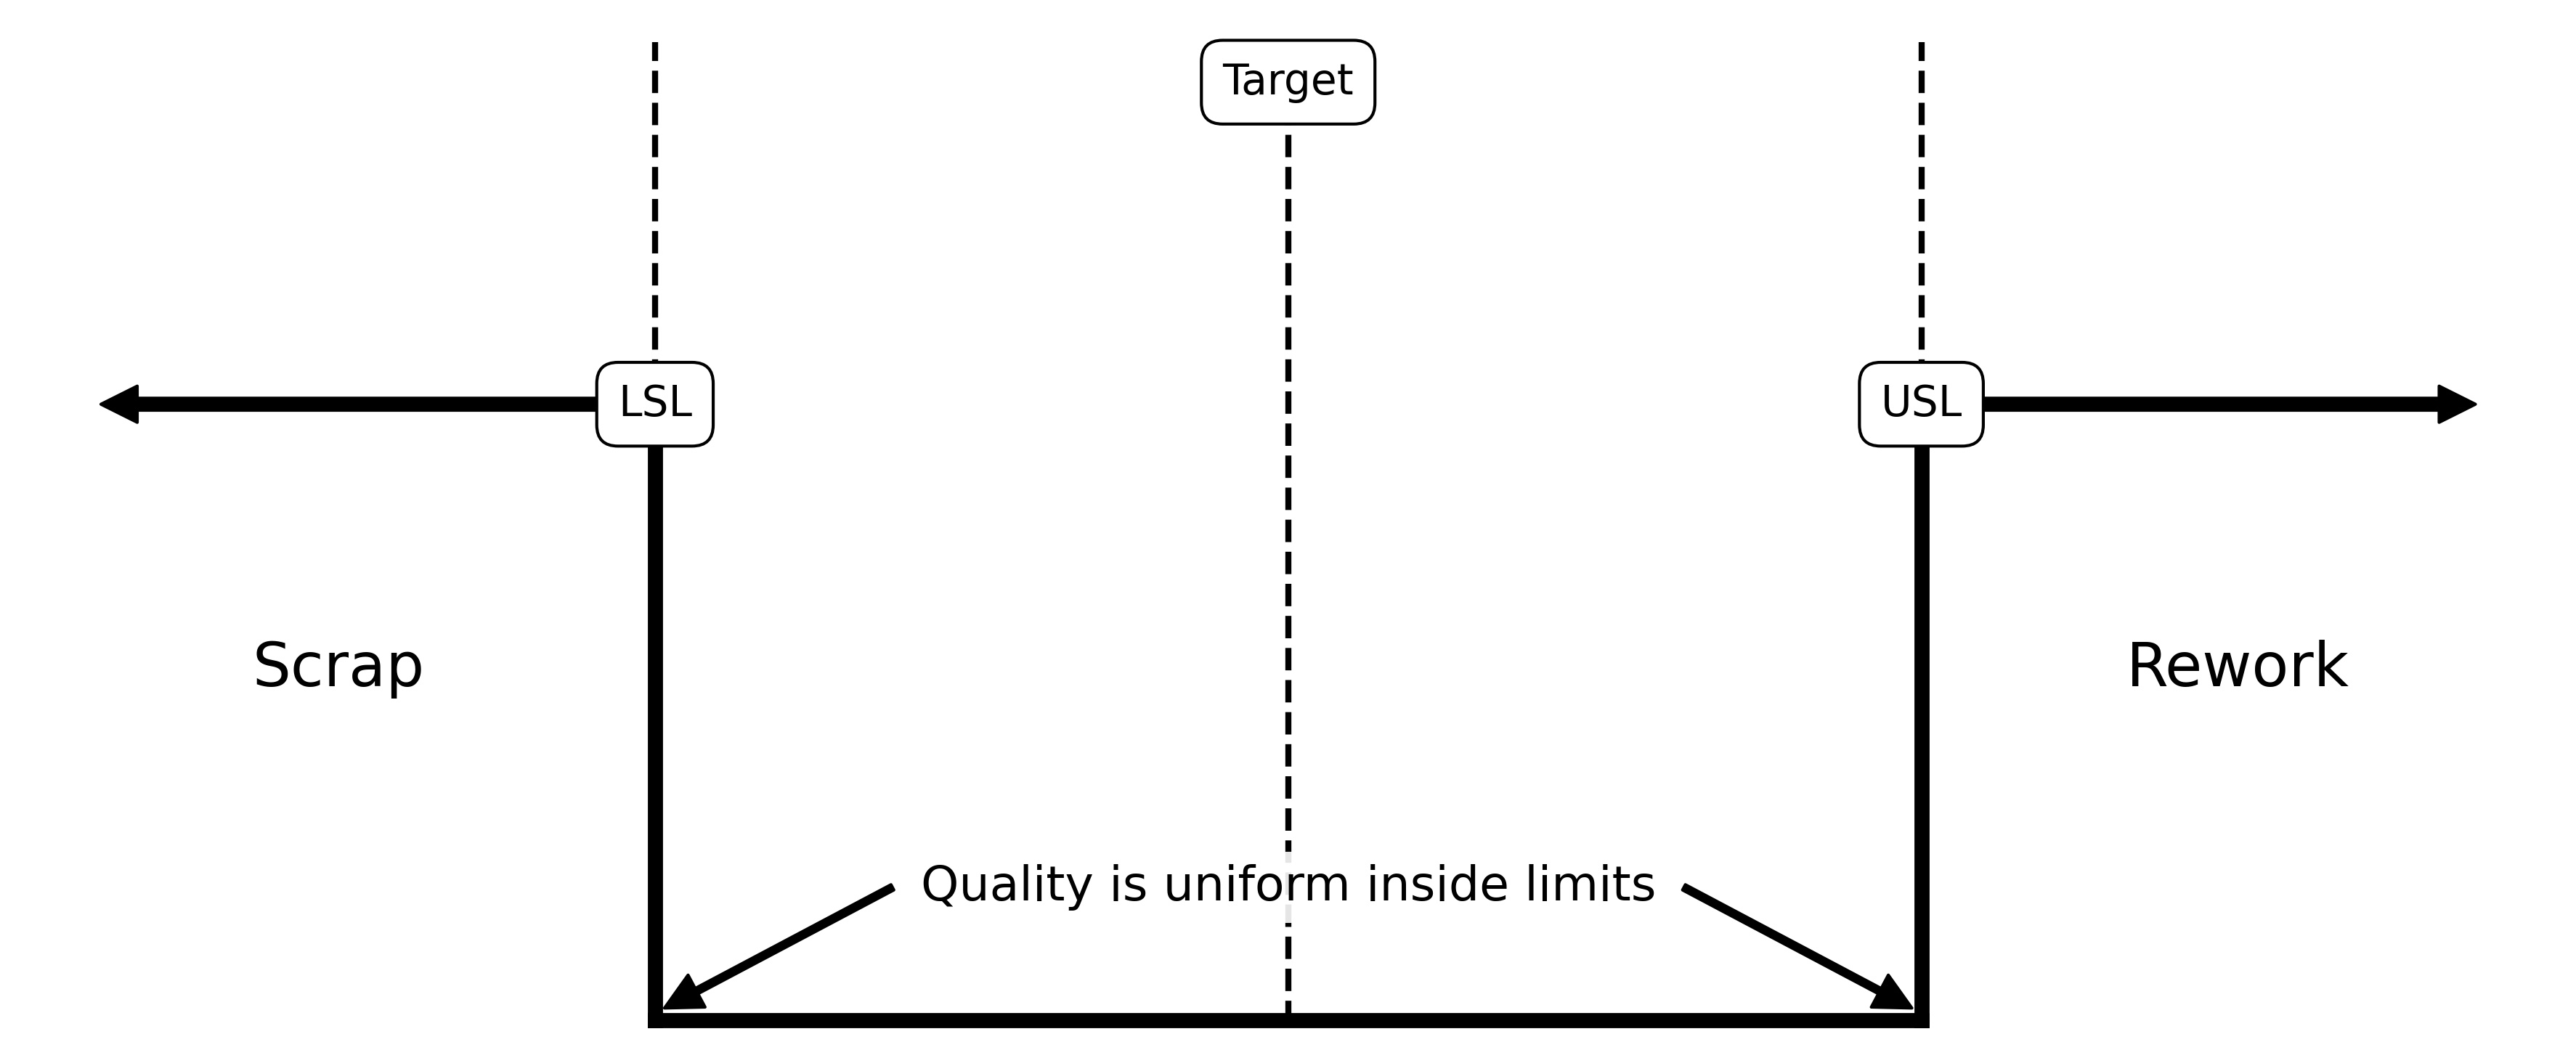

In [4]:
# Create figure
fig, ax = plt.subplots(figsize=(15, 6), dpi=300)

# Specification limits (LSL, USL, Target)
spec_limits = [-2, 0, 2]
for x in spec_limits:
    ax.axvline(x, ls='--', lw=2, color='black', ymin=0.005, ymax=0.9 if x == 0 else 0.98)

# Outside limit horizontal arrows
for x_start, x_end in [(-3.75, -2), (3.75, 2)]:
    ax.annotate('', xy=(x_start, 0.31), xytext=(x_end, 0.31),
                arrowprops=dict(edgecolor='black', facecolor='black'))

# Text labels for limits
labels = { -2: "LSL", 2: "USL", 0: "Target"}
for x, label in labels.items():
    ax.text(x, 0.31 if x else 0.47, label, ha='center', va='center', fontsize=14,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))

# Central quality message
ax.text(0, 0.07, 'Quality is uniform inside limits',
        ha='center', va='center', fontsize=16,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))

# Arrows pointing inside limits
for x_start, x_end in [(-1.97, -1.25), (1.97, 1.25)]:
    ax.annotate('', xy=(x_start, 0.01), xytext=(x_end, 0.07),
                arrowprops=dict(edgecolor='black', facecolor='black', width=2))

# Thick boundary lines at LSL and USL
for x in [-2, 2]:
    ax.axvline(x, ls='-', lw=5, color='black', ymax=0.62)

# Horizontal connect spec limits
ax.axhline(0.004, ls='-', lw=5, color='black', xmin=0.25, xmax=0.75)

# 'Scrap' and 'Rework' labels
ax.text(-3, 0.17, 'Scrap', ha='center', fontsize=20)
ax.text(3, 0.17, 'Rework', ha='center', fontsize=20)

# Remove top and right spines for cleaner look
sns.despine()
ax.spines[['left', 'bottom']].set_alpha(0.5)

# Set axis limits
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])

# Remove axes
ax.set_axis_off()

# Show plot
plt.show()

## Fig 26.2: The quality continuum

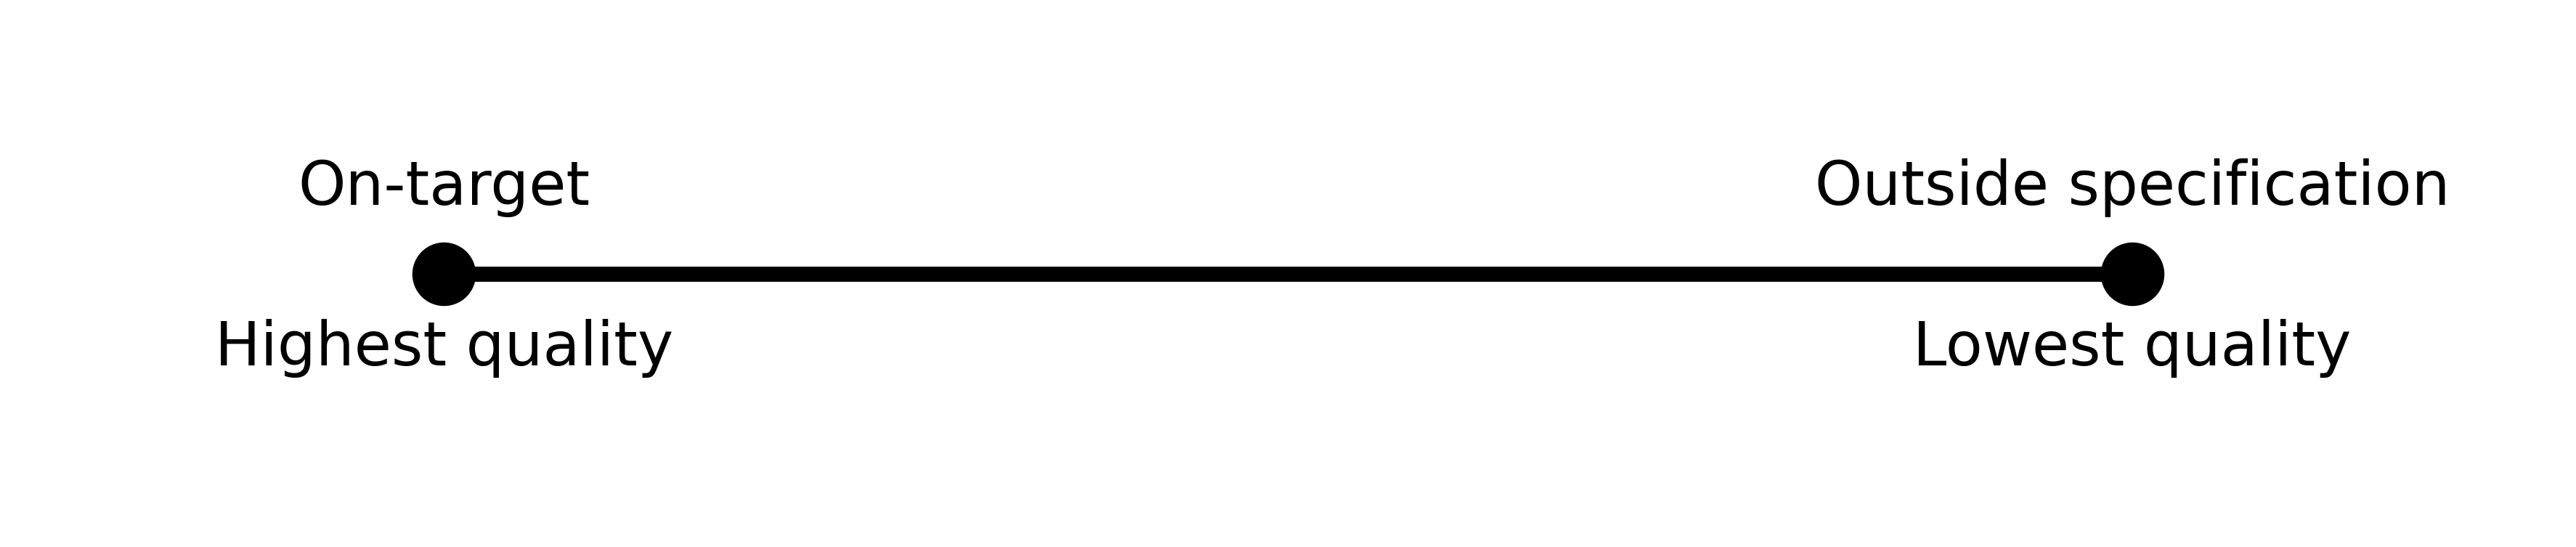

In [5]:
# Line parameters
line = [1,1]
# Quality continuum
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,3),dpi=300)

# Plot quality continuum
ax.plot(line, ls='-', marker='o', markersize=20, lw=5, color='black')

# Define labels and positions
labels = ['On-target', 'Outside specification']
quality_labels = ['Highest quality', 'Lowest quality']
positions = [0,1]

# Add labels
for pos, label, quality_label in zip(positions, labels, quality_labels):
    ax.text(pos, 1.015, label, ha='center', fontsize=20)
    ax.text(pos, 0.98, quality_label, ha='center', fontsize=20)

# Set x-axis limits
ax.set_xlim([-0.25,1.25])

# Remove axis
ax.set_axis_off()

# Show plot
plt.show()

## Fig 26.3: The Taguchi loss function

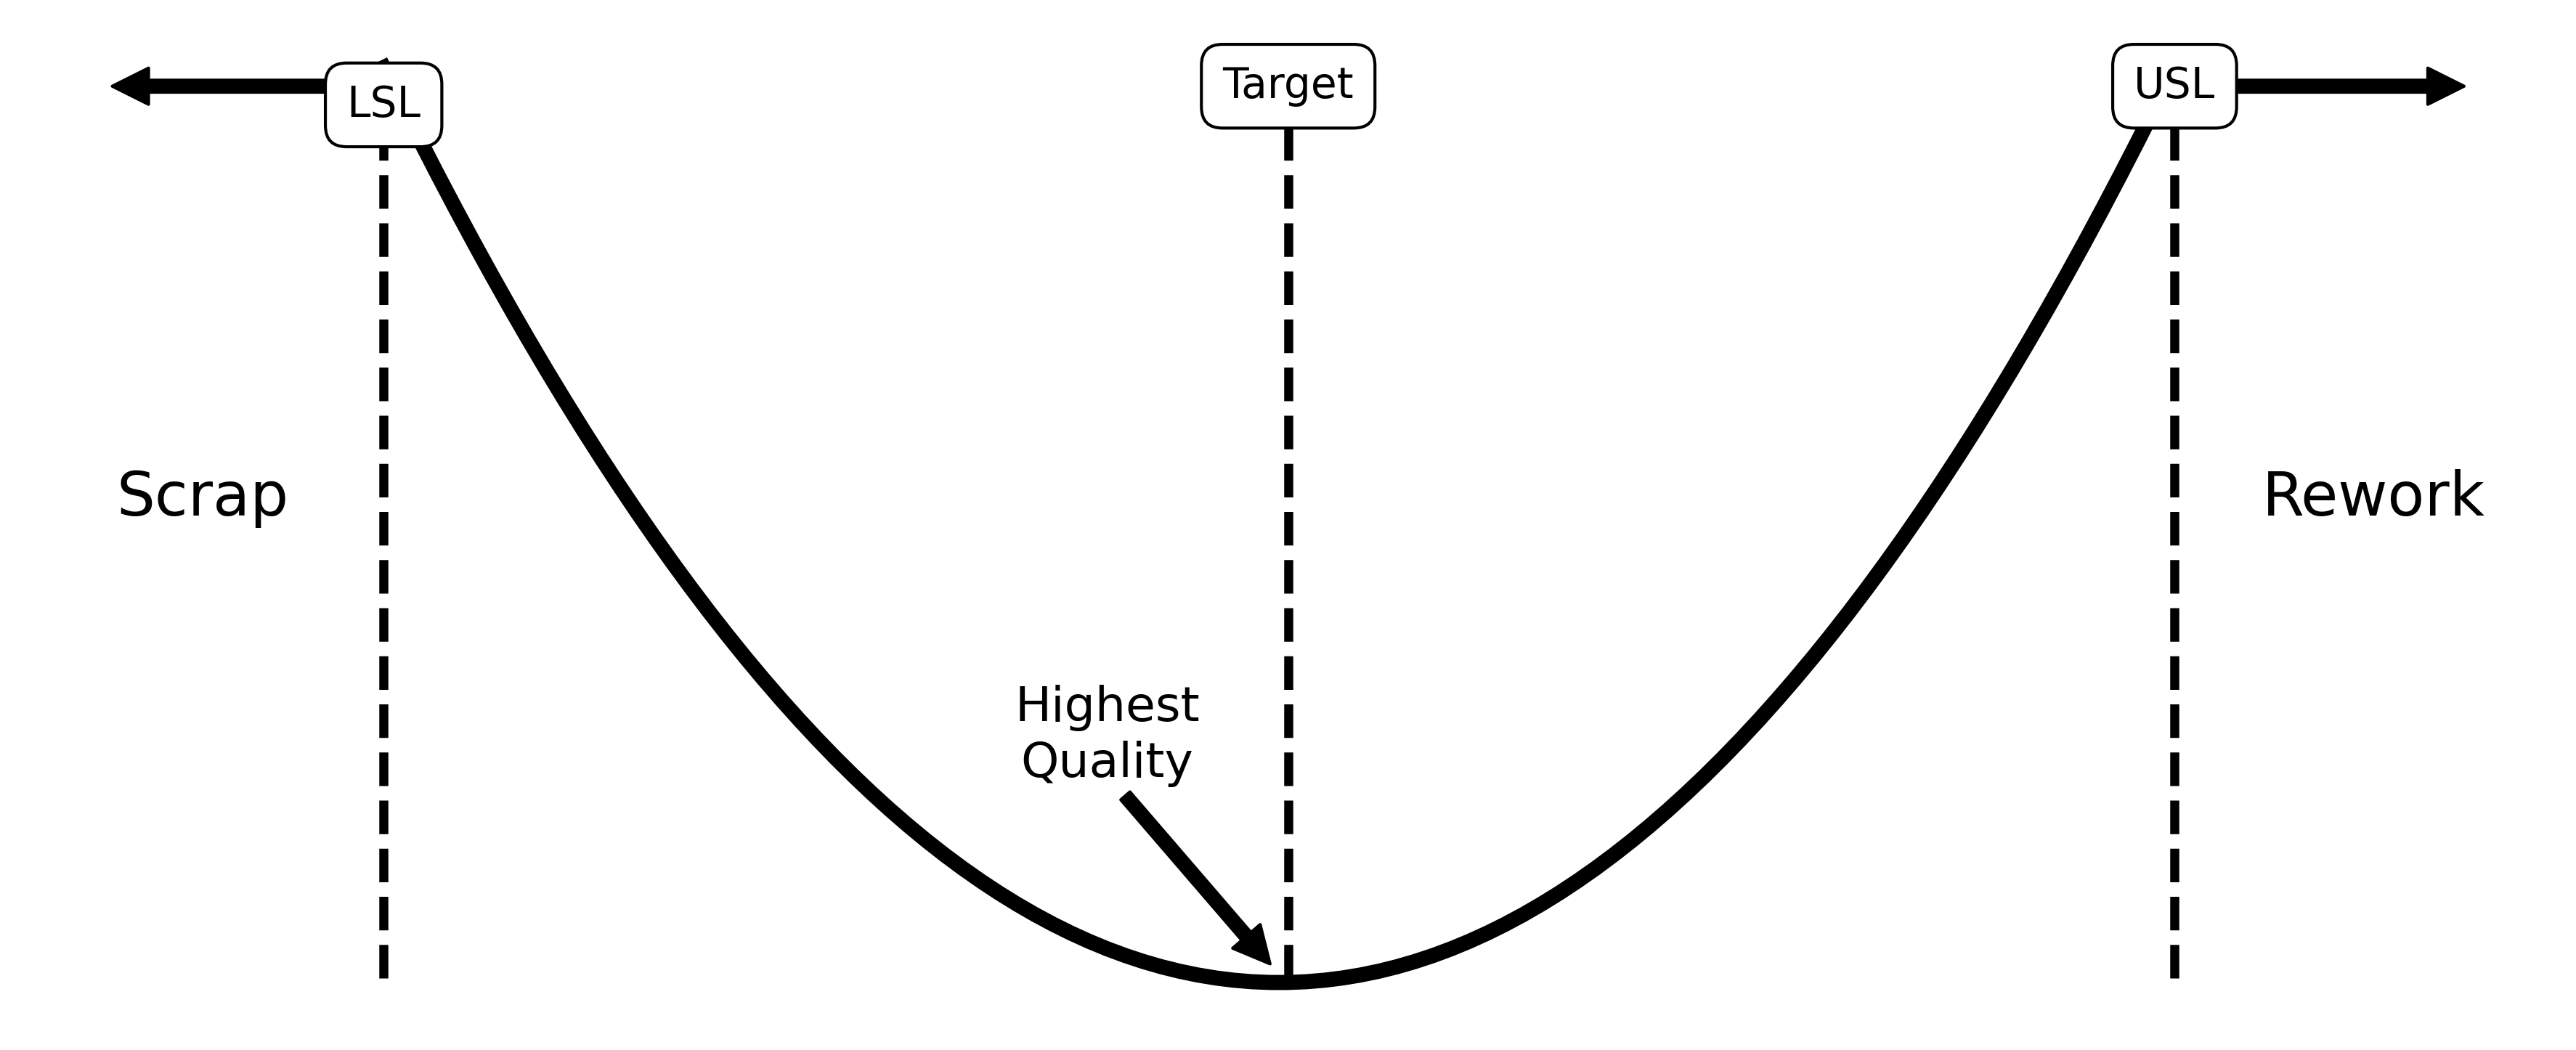

In [7]:
# Specify parabola
x = np.linspace(-0.7, 0.7, 100)
y = x**2

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 6), dpi=300)

# Plot parabola
ax.plot(y, ls='-', lw=5, color='black')

# Specification limits (LSL, Target, USL)
spec_limits = [0, 50, 99]
ymax_values = [0.95, 0.90, 0.95]  # Different ymax for each line

for x_val, ymax in zip(spec_limits, ymax_values):
    ax.axvline(x_val, ls='--', lw=3, color='black', ymin=0.05, ymax=ymax)

# Outside limit horizontal arrows
arrow_positions = [(-15, 0.48, 0, 0.48), (115, 0.48, 100, 0.48)]
for x_start, y_start, x_end, y_end in arrow_positions:
    ax.annotate('', xy=(x_start, y_start), xytext=(x_end, y_end),
                arrowprops=dict(edgecolor='black', facecolor='black'))

# Text labels for LSL, USL, and Target
labels = {0: "LSL", 99: "USL", 50: "Target"}

for x_val, label in labels.items():
    ax.text(x_val, 0.48 if x_val else 0.47, label, ha='center', va='center', fontsize=14,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))

# Scrap & Rework labels
ax.text(-10, 0.25, 'Scrap', ha='center', fontsize=20)
ax.text(110, 0.25, 'Rework', ha='center', fontsize=20)

# Quality label
ax.text(40, 0.14, 'Highest', ha='center', fontsize=16)
ax.text(40, 0.11, 'Quality', ha='center', fontsize=16)

# Arrow pointing towards "Highest Quality"
ax.annotate('', xy=(49, 0.01), xytext=(41, 0.1),
            arrowprops=dict(edgecolor='black', facecolor='black'))

# Remove axis visibility
ax.set_axis_off()

# Set x-axis limits
ax.set_xlim([-20, 120])

# Modify spine visibility and transparency
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

for spine in ['bottom', 'left']:
    ax.spines[spine].set_alpha(0.6)

# Show plot
plt.show()

## Fig 26.4: On-target with minimum variance

In [8]:
# Create seed for data repeatability
np.random.seed(42)

# Generate datasets for Figure 4
D1 = np.random.normal(loc=41.5, scale=1, size=500)
D2 = np.random.normal(loc=40, scale=1, size=500)
D3 = np.random.normal(loc=42.5, scale=0.5, size=500)
D4 = np.random.normal(loc=40, scale=0.5, size=500)

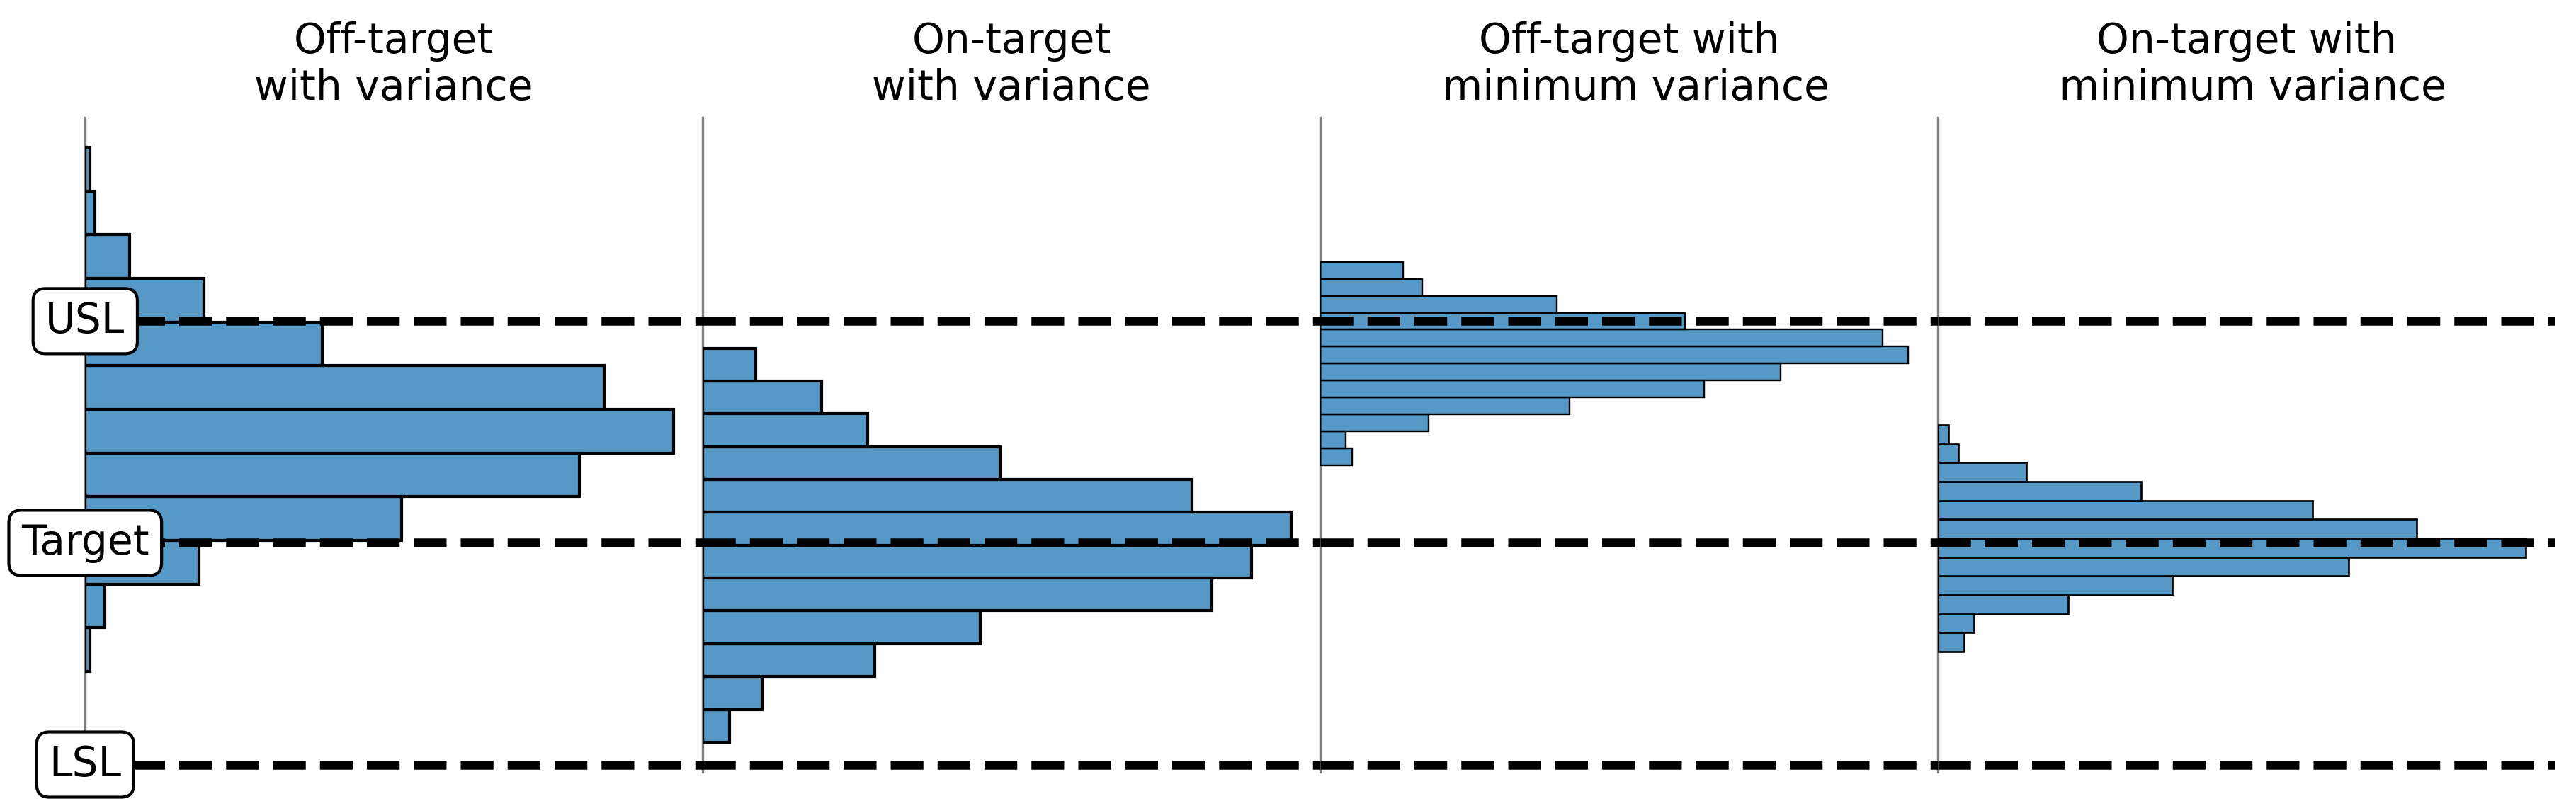

In [9]:
# USL, LSL, tolerance, and target
tolerance = 3
target = 40
USL = target + tolerance
LSL = target - tolerance

# Create subplots
fig, ax = plt.subplots(ncols=4, figsize=(15, 4), sharey=True, dpi=300)
plt.subplots_adjust(wspace=0)

# Plot histograms
data = [D1, D2, D3, D4]
for i, data_set in enumerate(data):
    sns.histplot(y=data_set, ax=ax[i], bins=12)

# Add target and limits lines
lines = [(target, '--', 'black', 3), (USL, '--', 'black', 3), (LSL, '--', 'black', 3)]
for axis in ax:
    for x_value, linestyle, color, linewidth in lines:
        axis.axhline(x_value, ls=linestyle, c=color, lw=linewidth)
    axis.set_xticks([])
    axis.set_xlabel('')
    axis.spines['left'].set_alpha(0.5)

# Define subplot titles
titles = ['Off-target\nwith variance', 'On-target\nwith variance', 'Off-target with\n minimum variance', 'On-target with\n minimum variance']
for i, axis in enumerate(ax.flat):
    axis.set_title(titles[i], fontsize=14)

# Common annotation properties
annotation_props = {
    'ha': 'center', 'va': 'center', 'fontsize': 14,
    'bbox': dict(facecolor='white', edgecolor='black', boxstyle='round')
}

# Add annotations only to the first plot (ax[0])
annotations = [('Target', target), ('USL', USL), ('LSL', LSL)]
for label, y_value in annotations:
    ax[0].annotate(label, xy=(0, y_value), **annotation_props)

# Remove spines and ticks from the first plot
sns.despine(bottom=True)
ax[0].set_yticks([])

# Show plot
plt.show()